## *Analysis on Billionaires Dataset*

## Objectives
1. **Wealth Analysis and Trends:**
   - Analyze the wealth distribution, trends, and factors affecting the net worth of billionaires globally.
   - Identify patterns and insights related to their source of wealth, industries, and self-made status.

2. **Demographic Profiling:**
   - Profile billionaires based on age, gender and birth country.
   - Analyze the demographics to understand the diversity and trends within the billionaire community.

3. **Geospatial Analysis:**
   - Conduct geospatial analysis to visualize the distribution of billionaires across different countries.
   - Explore any correlations between geographic location, economic factors, and billionaire density.

4. **Economic Indicators and Billionaires:**
   - Investigate the relationship between economic indicators (GDP, education enrollment, life expectancy, tax rates, etc.) and the presence of billionaires in specific countries.

## Scope
1. **Data Preparation:**
   - Clean and preprocess the dataset, handling missing values, outliers, and ensuring consistency.
   - Select relevant features and perform feature engineering to enhance the dataset for analysis.

2. **Descriptive Analysis:**
   - Conduct descriptive statistics and visualization to provide an overview of the dataset's characteristics.
   - Analyze basic statistics such as mean, median, and standard deviation for key variables.

3. **Wealth and Demographic Analysis:**
   - Explore the distribution of wealth (finalWorth) among billionaires and identify the top categories, industries, and sources contributing to their wealth.
   - Analyze demographic information including age, gender, birth country, and residence state/region of billionaires.

4. **Geospatial Visualization:**
   - Create maps and visualizations to display the geographic distribution of billionaires and their respective net worths across different countries.

5. **Correlation Analysis:**
   - Conduct correlation analysis to identify relationships between economic indicators (GDP, education enrollment, life expectancy, tax rates) and the presence of billionaires.

6. **Insights and Recommendations:**
   - Summarize findings and provide insights on trends, patterns, and correlations discovered during the analysis.
   - Propose recommendations based on the analysis that can guide further research or policy decisions related to wealth distribution and economic development.

By focusing on these objectives and scope, the project aims to derive valuable insights from the billionaire dataset and provide a deeper understanding of the factors influencing wealth distribution globally.

## Data Collection and Preparation

The source of information is Kaggle who is an online platform and community that hosts data science competitions, provides datasets for practice, offers a cloud-based workbench for data analysis, and facilitates collaboration among data scientists and machine learning practitioners.

Next We'll download the data set with an API key and make sure it is clean and prepared for analysis.

In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [22]:
import kaggle

! kaggle datasets list -s"Billionaires-Statistics-Dataset"

ref                                               title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/billionaires-statistics-dataset  Billionaires Statistics Dataset (2023)  139KB  2023-09-29 13:39:28           1900         61  1.0              
nelgiriyewithana/top-spotify-songs-2023           Most Streamed Spotify Songs 2023         47KB  2023-08-26 11:04:57          27042        816  1.0              


In [23]:
! kaggle datasets download -d "nelgiriyewithana/billionaires-statistics-dataset"

billionaires-statistics-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile
with zipfile.ZipFile('Billionaires-Statistics-Dataset.zip', 'r') as file:
    file.extractall('Billonaires')

In [25]:
import os
os.listdir('Billonaires')

['Billionaires Statistics Dataset.csv', 'Billonaires.xlsx']

In [26]:
df = pd.read_csv('Billonaires/Billionaires Statistics Dataset.csv')
df.head(20)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


## Exploratory Data Analysis (EDA)
To perform the Exploratory Data Analysis (EDA) on the provided dataset of billionaires, we'll conduct descriptive analysis to understand its structure, distribution, relationships, and trends. We'll use visualizations and statistical techniques to extract initial insights and generate hypotheses.

In [27]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [29]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [30]:
df.shape

(2640, 35)

In [31]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [32]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [33]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

Wealth Distribution Histogram:
This histogram illustrates the distribution of wealth among billionaires. 
The x-axis represents the wealth, and the y-axis shows the frequency or count of billionaires falling within specific wealth ranges. 
It provides an overview of how wealth is distributed across the billionaire population.


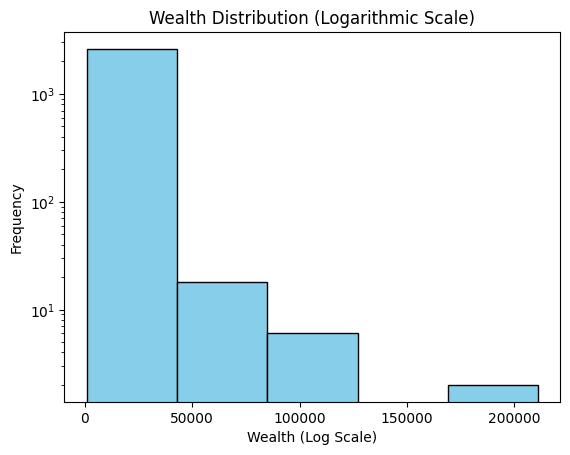

Age Distribution Histogram:
This histogram displays the distribution of ages among billionaires. 
The x-axis represents age groups, and the y-axis shows the frequency or count of billionaires within each age group. 
It helps visualize the age demographics of the billionaire population.


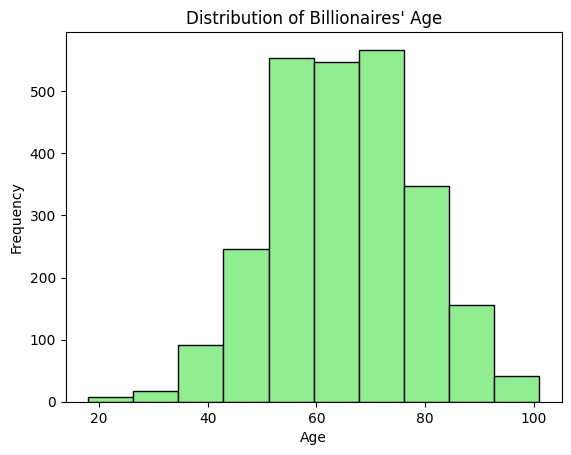

Corruption Perceptions Index (CPI) Distribution Histogram:
This histogram showcases the distribution of the Corruption Perceptions Index (CPI) among countries. 
The x-axis represents the CPI scores, and the y-axis displays the frequency or count of countries falling within specific CPI score ranges. 
It provides insights into the perceived levels of corruption in different countries.


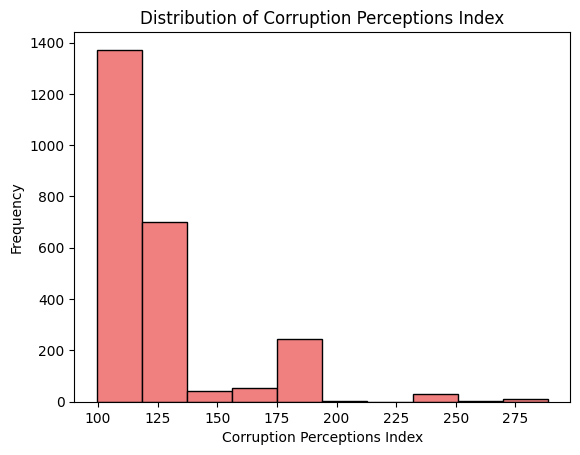

Descriptive statistics:
          finalWorth          age  cpi_country
count    2640.000000  2575.000000  2456.000000
mean     4623.787879    65.140194   127.755204
std      9834.240939    13.258098    26.452951
min      1000.000000    18.000000    99.550000
25%      1500.000000    56.000000   117.240000
50%      2300.000000    65.000000   117.240000
75%      4200.000000    75.000000   125.080000
max    211000.000000   101.000000   288.570000


In [34]:
import matplotlib.pyplot as plt

# Calculate descriptive statistics
statistics = df[['finalWorth', 'age', 'cpi_country', 'gdp_country']].describe()

# Create a histogram with a logarithmic x-axis scale for wealth distribution
plt.hist(df['finalWorth'], bins=5, color='skyblue', edgecolor='black', log=True)  # log scale
plt.xlabel('Wealth (Log Scale)')
plt.ylabel('Frequency')
plt.title('Wealth Distribution (Logarithmic Scale)')
print("""Wealth Distribution Histogram:
This histogram illustrates the distribution of wealth among billionaires. 
The x-axis represents the wealth, and the y-axis shows the frequency or count of billionaires falling within specific wealth ranges. 
It provides an overview of how wealth is distributed across the billionaire population.""")
plt.savefig('fig1.png')
plt.show()

# Visualize the distribution of age ('age') with a histogram
plt.hist(df['age'].dropna(), bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Billionaires' Age")
print("""Age Distribution Histogram:
This histogram displays the distribution of ages among billionaires. 
The x-axis represents age groups, and the y-axis shows the frequency or count of billionaires within each age group. 
It helps visualize the age demographics of the billionaire population.""")
plt.savefig('fig2.png')
plt.show()

# Visualize the distribution of the Corruption Perceptions Index ('cpi_country') with a histogram
plt.hist(df['cpi_country'].dropna(), bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Corruption Perceptions Index')
plt.ylabel('Frequency')
plt.title('Distribution of Corruption Perceptions Index')
print("""Corruption Perceptions Index (CPI) Distribution Histogram:
This histogram showcases the distribution of the Corruption Perceptions Index (CPI) among countries. 
The x-axis represents the CPI scores, and the y-axis displays the frequency or count of countries falling within specific CPI score ranges. 
It provides insights into the perceived levels of corruption in different countries.""")
plt.savefig('fig3.png')
plt.show()

# Print descriptive statistics
print('Descriptive statistics:')
print(statistics)

# Billionaire Segmentation

Segmenting billionaires based on gender, country, and self-made status. Analyzing the distribution of wealth within each segment to understand how wealth is distributed across different demographic and self-made categories.

In [35]:
# Segment by gender
gender_segmentation = df.groupby('gender')['finalWorth'].mean().round(2)
# Segment by country
country_segmentation = df.groupby('country')['finalWorth'].mean().round(2)
# Segment by selfMade
selfmade_segmentation = df.groupby('selfMade')['finalWorth'].mean().round(2)

print("Mean wealth by gender:\n", gender_segmentation)
print("\nMean wealth by country:\n", country_segmentation)
print("\nMean wealth by selfMade:\n", selfmade_segmentation)

Mean wealth by gender:
 gender
F    4570.33
M    4631.61
Name: finalWorth, dtype: float64

Mean wealth by country:
 country
Algeria            4600.00
Andorra            1500.00
Argentina          2750.00
Armenia            1200.00
Australia          4034.88
                    ...   
United Kingdom     4520.73
United States      6067.77
Uruguay            1800.00
Uzbekistan        14400.00
Vietnam            2100.00
Name: finalWorth, Length: 78, dtype: float64

Mean wealth by selfMade:
 selfMade
False    4970.41
True     4465.40
Name: finalWorth, dtype: float64


# Correlations
Calculating correlations between various variables such as age, Corruption Perceptions Index (CPI), Gross Domestic Product (GDP), life expectancy, etc., and the wealth of billionaires. Visualizing these correlations using a heatmap to identify significant relationships.

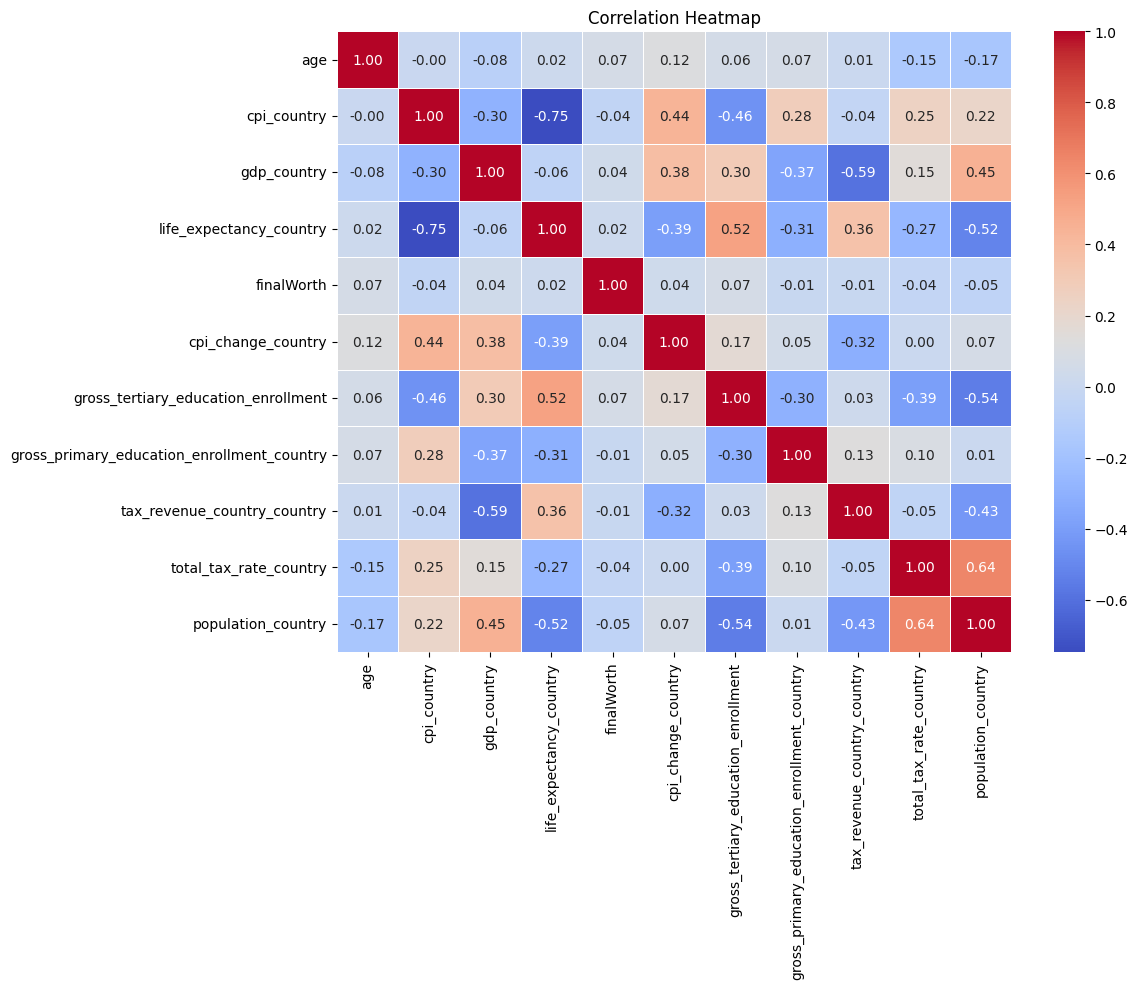

In [36]:
import seaborn as sns

df['gdp_country'] = df['gdp_country'].str.replace('$', '')
df['gdp_country'] = df['gdp_country'].str.replace(',', '').fillna(0)
df['gdp_country'] = df['gdp_country'].astype('float').astype('int64')

# Calculate correlations
correlations = df[['age','cpi_country', 'gdp_country', 'life_expectancy_country', 'finalWorth', 'cpi_change_country', 'gross_tertiary_education_enrollment', 
                   'gross_primary_education_enrollment_country',
                   'tax_revenue_country_country', 'total_tax_rate_country', 'population_country']].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('fig4.png')
plt.show()

**Values in the heatmap**
  The values in each box of the heatmap represent the correlation between two variables. Correlation quantifies the linear relationship between two variables, indicating the strength and direction of the relationship.
  The values range from -1 to 1:
  - **1:** Perfect positive correlation (when one variable increases, the other also increases proportionally).
  - **0:** No correlation (variables are not linearly related).
  - **-1:** Perfect negative correlation (when one variable increases, the other decreases proportionally).

**Value Range**
The minimum possible correlation value is -1, representing a perfect negative correlation.
The maximum possible correlation value is 1, representing a perfect positive correlation.
The correlation values between -1 and 0 indicate a negative correlation (as one variable increases, the other tends to decrease).
The correlation values between 0 and 1 indicate a positive correlation (as one variable increases, the other tends to increase).

Understanding these correlations is important to grasp how the variables in the dataset are related to each other. These correlations provide valuable insights for future analyses and decision-making, such as investment strategies, economic policies, or inequality analysis.

**Correlation with 'finalWorth'**
   The 'finalWorth' variable, representing the wealth of billionaires, shows relatively low correlations with the other variables in the dataset. This suggests that the wealth of a billionaire ('finalWorth') is not strongly linearly correlated with age, country GDP, CPI (Consumer Price Index), or life expectancy.

**Strong Negative Correlation between 'cpi_country' and 'life_expectancy_country'**
   The correlation coefficient of approximately -0.75 between CPI (Consumer Price Index) and life expectancy for a country indicates a strong negative linear relationship. In this dataset, as the CPI for a country increases (indicating higher inflation), the life expectancy tends to decrease, and vice versa. This may suggest potential economic and social factors affecting both inflation and life expectancy.

These interpretations help understand the relationships between variables and can guide further analysis or decision-making related to billionaires' wealth and socioeconomic indicators.

# Geospatial Analysis:
Using latitude and longitude coordinates to create a map illustrating the geographic distribution of billionaires worldwide. Investigating potential correlations between geographical location and wealth distribution.

The first plot, titled "Distribution of Billionaires Worldwide" is a map of the world displaying the locations of billionaires. The red dots represent the geographical positions (latitude and longitude) where billionaires are located. Each dot represents the location of one or more billionaires.

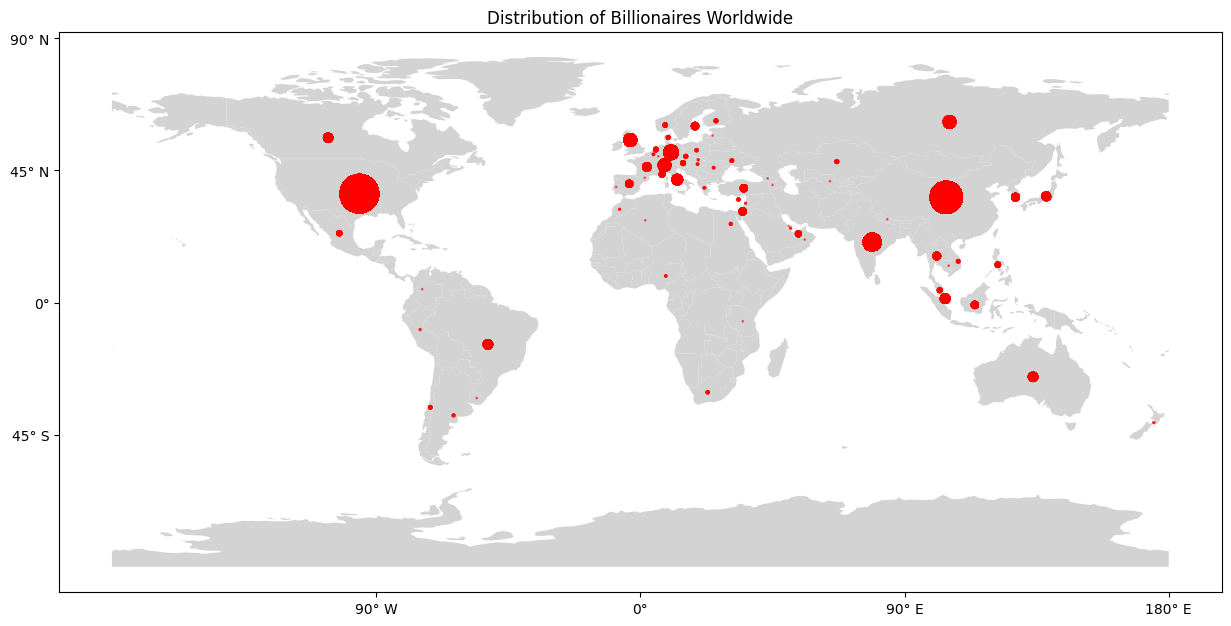

,Country,Billonaires,Percentage
0,United States,754,30.45
1,China,523,21.12
2,India,157,6.34
3,Germany,102,4.12
4,United Kingdom,82,3.31
5,Russia,79,3.19
6,Switzerland,78,3.15
7,Italy,55,2.22
8,Singapore,46,1.86
9,Brazil,44,1.78


In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame using latitude and longitude
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude_country, df.latitude_country))

# Drop rows with missing coordinates
gdf = gdf.dropna(subset=['longitude_country', 'latitude_country'])

# Calculate the frequency of each coordinate pair
coordinate_counts = gdf.groupby(['longitude_country', 'latitude_country']).size()

# Set marker size proportional to the coordinate frequency
gdf['marker_size'] = gdf.apply(lambda row: coordinate_counts.get((row['longitude_country'], row['latitude_country']), 0), axis=1)

world = gpd.read_file('C:/Users/overr/OneDrive/Documentos/Data Analyst/GeoLocation/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Plot the world map with billionaire locations
ax = world.plot(figsize=(15, 10), color='lightgrey')

# Plot billionaire locations with marker size proportional to frequency
gdf.plot(ax=ax, markersize=gdf['marker_size'], color='red', alpha=0.5)

# Replace numerical x and y labels with text
ax.set_xticks([-90, 0, 90, 180])
ax.set_yticks([-45, 0, 45, 90])
ax.set_yticklabels(['45° S', '0°', '45° N', '90° N'])
ax.set_xticklabels(['90° W', '0°', '90° E', '180° E'])

plt.title('Distribution of Billionaires Worldwide')
plt.savefig('fig5.png')
plt.show()

country_counts = gdf['country'].value_counts()

df_country_counts = pd.DataFrame({'Country': country_counts.index, 'Billonaires': country_counts.values})
total_billonaires = df_country_counts['Billonaires'].sum()

df_country_counts['Percentage'] = (df_country_counts['Billonaires'] / total_billonaires) * 100
df_country_counts['Percentage'] = df_country_counts['Percentage'].round(2)

pd.set_option('display.max_rows', None)
df_country_counts

# Demographic Analysis:
Exploring the distribution of age and gender among billionaires. Calculating the average age and gender proportions within the billionaire population.

<Figure size 1000x600 with 0 Axes>

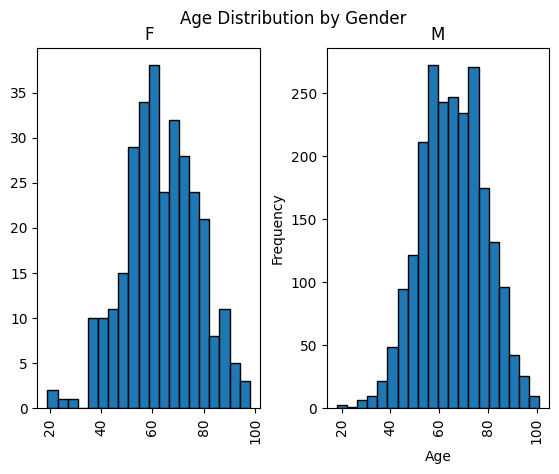

Average Age: 65.0


,proportion
gender,
M,0.872348
F,0.127652


In [38]:
# Explore age distribution by gender
plt.figure(figsize=(10, 6))
df['age'].hist(by=df['gender'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.suptitle('Age Distribution by Gender')
plt.savefig('fig6.png')
plt.show()

# Calculate average age and gender proportion
average_age = df['age'].mean()
gender_proportion = df['gender'].value_counts(normalize=True)
country_counts = df['country'].value_counts()

print("Average Age:", average_age.round(0))

df_gender_proportion = pd.DataFrame(gender_proportion)
df_gender_proportion


# Country Comparison:
Comparing the average wealth among billionaires in different countries. Investigating the influence of the Corruption Perceptions Index (CPI) and Gross Domestic Product (GDP) on billionaire wealth to understand the economic and social factors at play.

In [39]:
# Calcular la media de la riqueza por país para los 10 países principales
mean_wealth_by_country = df.groupby('country')['finalWorth'].mean().sort_values(ascending=False).head(10)

# Calcular la media de CPI y GDP por país
cpi_vs_wealth = df.groupby('country').agg({'finalWorth': 'mean', 'cpi_country': 'mean'})
gdp_vs_wealth = df.groupby('country').agg({'finalWorth': 'mean', 'gdp_country': 'mean'})
cpi_vs_wealth.fillna(0, inplace=True)
gdp_vs_wealth['gdp_country'] = gdp_vs_wealth['gdp_country'].astype('int64')

# Imprimir los resultados
print("Average wealth by country (Top 10):\n", mean_wealth_by_country.round(2))
print("\nComparison of CPI and wealth:\n", cpi_vs_wealth.head().round(2))
print("\nComparison of GDP and wealth:\n", gdp_vs_wealth.head().round(2))

Average wealth by country (Top 10):
 country
Uzbekistan              14400.00
France                  14271.43
Belgium                 13733.33
Mexico                  12746.15
Nigeria                  9500.00
Austria                  6854.55
Eswatini (Swaziland)     6500.00
Colombia                 6400.00
Czech Republic           6114.29
United States            6067.77
Name: finalWorth, dtype: float64

Comparison of CPI and wealth:
            finalWorth  cpi_country
country                           
Algeria       4600.00       151.36
Andorra       1500.00         0.00
Argentina     2750.00       232.75
Armenia       1200.00       129.18
Australia     4034.88       119.80

Comparison of GDP and wealth:
            finalWorth    gdp_country
country                             
Algeria       4600.00   169988236398
Andorra       1500.00     3154057987
Argentina     2750.00   449663446954
Armenia       1200.00    13672802158
Australia     4034.88  1392680589329


## Billonaires, age and industries

A summary of descriptive statistics for the 'finalWorth' column.
A scatter plot showing the relationship between age and final worth on a logarithmic scale.
A box plot displaying the distribution of final worth for various industries.
The scatter plot helps to visualize how the age of billionaires relates to their final worth. The box plot allows for a comparison of the final worth distribution across different industries.

Wealth Distribution Summary:
count       238.000000
mean      10637.815126
std       21952.295773
min        1000.000000
25%        2100.000000
50%        3800.000000
75%        7575.000000
max      180000.000000
Name: finalWorth, dtype: float64


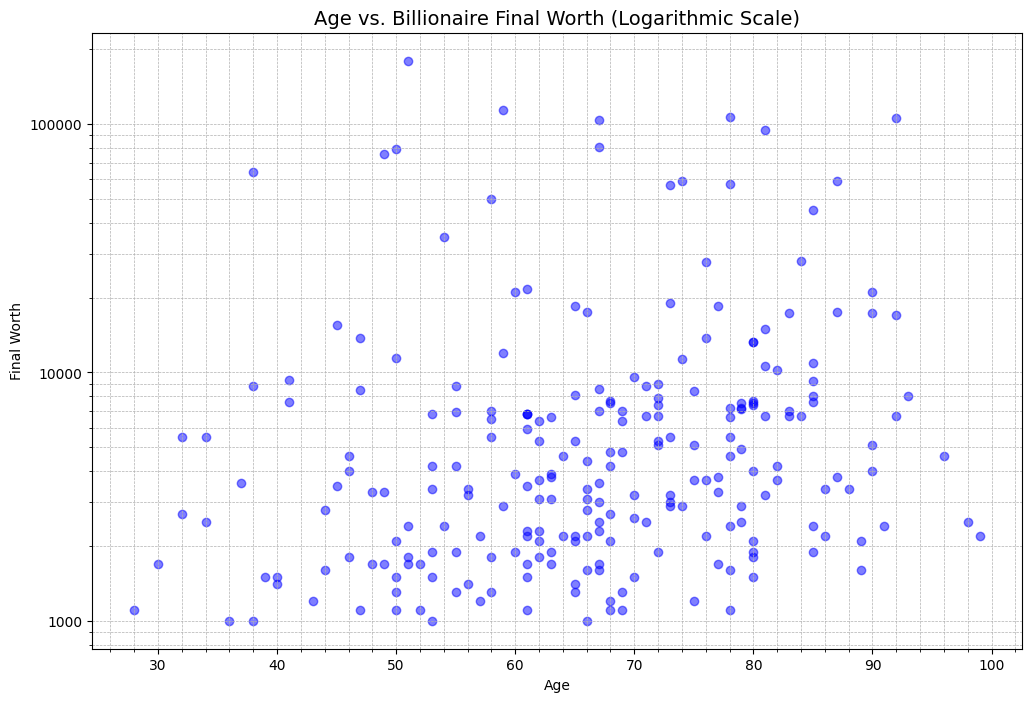

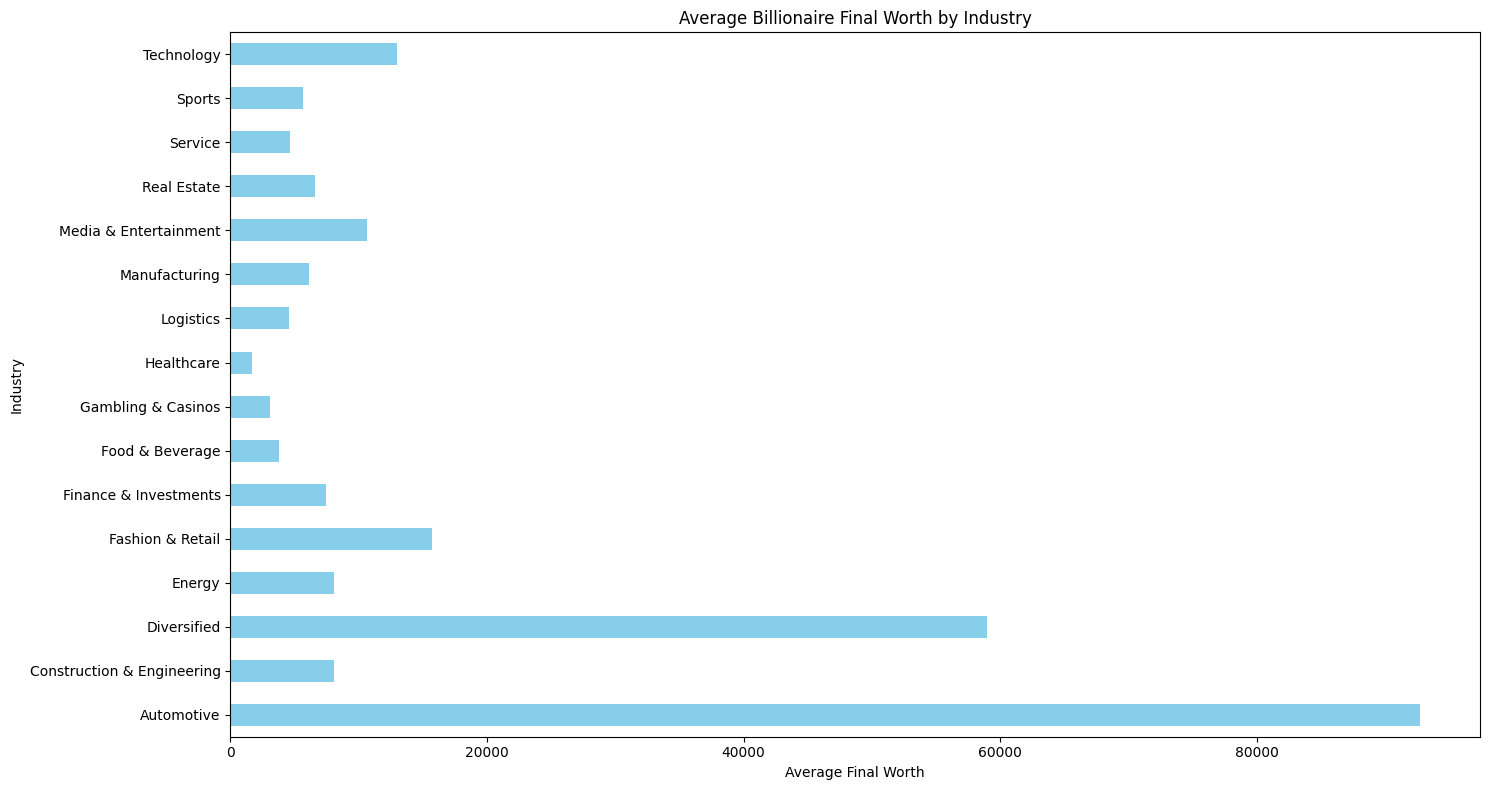

In [40]:
from matplotlib.ticker import ScalarFormatter

# Data Cleaning: Handle missing values and inconsistencies if any
df.dropna(inplace=True)

# Descriptive Statistics
wealth_stats = df['finalWorth'].describe()
print('Wealth Distribution Summary:')
print(wealth_stats)

# Factors Affecting Net Worth: Scatter plot with age (logarithmic scale on y-axis)
plt.figure(figsize=(12, 8))
plt.scatter(df['age'], df['finalWorth'], alpha=0.5, label='Billionaires', color='blue')
plt.xlabel('Age')
plt.ylabel('Final Worth')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Age vs. Billionaire Final Worth (Logarithmic Scale)', fontsize=14)

# Customize grid and style
plt.grid(True, which='both', linestyle='--', lw=0.5)
plt.minorticks_on()
highlight_y_min = 1e7  # Minimum Final Worth for highlighting
plt.savefig('fig7.png')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

# Agrupar datos por industria y calcular la media de la riqueza final
average_worth_by_industry = df.groupby('industries')['finalWorth'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
average_worth_by_industry.plot(kind='barh', color='skyblue')
plt.xlabel('Average Final Worth')
plt.ylabel('Industry')
plt.title('Average Billionaire Final Worth by Industry')
plt.tight_layout()
plt.savefig('fig8.png')
plt.show()

## Conclusions

Here is a conclusion based on the analysis of the billionaire dataset:

1. **Average Wealth by Country (Top 10):**
   The top countries with the highest average wealth per billionaire are Uzbekistan, France, Belgium, and Mexico.

2. **Comparison of CPI and Wealth:**
   Algeria, Andorra, and Argentina have varying levels of CPI (Consumer Price Index) and wealth. Argentina shows a relatively higher CPI compared to the other two countries.

3. **Comparison of GDP and Wealth:**
   Algeria, Andorra, and Argentina have different GDP levels in relation to wealth, with Argentina having a significantly higher GDP compared to the others.

4. **Gender Proportion:**
   The dataset predominantly consists of male billionaires (87.23%) compared to female billionaires (12.77%).

5. **Billionaires by Country:**
   The United States, China, India, Germany, and the United Kingdom have the highest numbers of billionaires.

6. **Correlation with 'FinalWorth':**
   The wealth of a billionaire ('finalWorth') does not show strong linear correlations with age, country GDP, CPI, or life expectancy, indicating that wealth is not directly proportional to these factors.

7. **Strong Negative Correlation between 'CPI_country' and 'Life_Expectancy_country':**
   A strong negative correlation is observed between CPI and life expectancy for a country, suggesting a potential link between economic factors (inflation) and societal well-being (life expectancy).

8. **Descriptive Statistics:**
   Descriptive statistics provide an overview of the distribution and central tendencies of 'finalWorth', 'age', and 'cpi_country' variables.

In summary, this analysis offers insights into the wealth distribution among billionaires, gender proportions, geographic distribution, and potential correlations with economic and demographic indicators, providing a foundational understanding of the dataset's characteristics. Further in-depth analyses and domain knowledge would be essential for comprehensive insights and decision-making.